### 2. Tokenization
#### word_tokenizer 실행 예시
    - nltk와 keras를 사용

In [1]:
#NLTK를 사용한 영어 word tokenization
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [2]:
sentence = "Don't be fooled by the dark sounding name, Mr.Jone's Orphanage is as cheery goes for a pastry shop"

print("단어 토큰화 1:", word_tokenize(sentence))
print("단어 토큰화 2:", WordPunctTokenizer().tokenize(sentence))
print("단어 토큰화 3:", text_to_word_sequence(sentence))

단어 토큰화 1: ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
단어 토큰화 2: ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
단어 토큰화 3: ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


    - 단어 토큰화 1(nltk의 word_tokenize): Don't를 Do과 n't, Mr.Jone과 's로 분리
    - 단어 토큰화 2(nltk의 WordPunctTokenizer().tokenize): 구두점을 별도로 분리하는 특징을 가지고 있어, Don과 '와 t, Jone과 .와 s로 분리
    - 단어 토큰화 3(keras의 text_to_word_sequence: 모든 알파벳을 소문자로 변환하고, 구두점들을 제거하지만 don't와 jone's로 아스트로피는 보존)

----------------------------

#### 표준 토큰화 방법인 Penn Treebank Tokenization
    - 실행 후 규칙에 따라 구분하고 있는지 확인 
    - 규칙은 다음과 같다
        1. 하이푼으로 구성된 단어는 하나로 유지한다.
        2. dosen't와 같이 아포스트로피로 접어가 함께하는 단어는 분리해준다.

In [3]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restrant of their own"

print("트리뱅크 토크나이저:", tokenizer.tokenize(text))

트리뱅크 토크나이저: ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restrant', 'of', 'their', 'own']


    - 결과를 확인해보면 규칙 1에 따라 home-based는 하나의 단어로 취급되고 있다.
    - doesn't는 규칙 2에 따라 does와 n't로 분리된다.

------------------------------------------

#### 문장 토큰화(Sentence Tokenize)
    - 가지고 있는 코퍼스를 문장 단위로 나누는 작업
    - 문장 분류(sentence segmentation)이라고도 불림
    - 코퍼스가 정제된 상태가 아니라면 문장 단위로 구분되어 있지 않아, 종종 사용됨

In [4]:
from nltk.tokenize import sent_tokenize

text = "His barber kept his word. But keeping such a huge secret to himself was driving hime crazy. Finally, the barber went up a mountatin and almost to the edge of a cliff. He dug a hole in the midst of some reads. He looked about, to make sure no one was near."

print("문장 토큰화1:", sent_tokenize(text))

문장 토큰화1: ['His barber kept his word.', 'But keeping such a huge secret to himself was driving hime crazy.', 'Finally, the barber went up a mountatin and almost to the edge of a cliff.', 'He dug a hole in the midst of some reads.', 'He looked about, to make sure no one was near.']


In [5]:
text = "I am actively looking for Ph.D students. and you are a Ph.D student."

print("문장 토큰화2:", sent_tokenize(text))

문장 토큰화2: ['I am actively looking for Ph.D students.', 'and you are a Ph.D student.']


nltk의 문장 토크나이저의 경우 마침표(.)를 기준으로 문장을 분리하지 않는 다는 것을 확인 가능하다. 

    - 한국어 버전의 문장 토크나이저도 존재한다. 
    - KSS(Korean Sentence Splitter)

In [6]:
import kss

text = "딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?"

print("한국어 문장 토큰화:", kss.split_sentences(text))

[Kss]: Because there's no supported C++ morpheme analyzer, Kss will take pecab as a backend. :D
For your information, Kss also supports mecab backend.
We recommend you to install mecab or konlpy.tag.Mecab for faster execution of Kss.
Please refer to following web sites for details:
- mecab: https://cleancode-ws.tistory.com/97
- konlpy.tag.Mecab: https://uwgdqo.tistory.com/363



한국어 문장 토큰화: ['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다.', '이제 해보면 알걸요?']


-------------------------------------------------------

#### 영어 토큰화 실습
    - 단어 토큰화 후 품사 태깅

In [7]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

text = "I am actively looking for Ph.D students. and you are a Ph.D student."
tokenized_sentence = word_tokenize(text)

print("단어 토큰화:", tokenized_sentence)
print("품사 태깅:", pos_tag(tokenized_sentence))

단어 토큰화: ['I', 'am', 'actively', 'looking', 'for', 'Ph.D', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D', 'student', '.']
품사 태깅: [('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D', 'NNP'), ('student', 'NN'), ('.', '.')]


    - Penn Treebank POG Tags에서는 인칭 대명사는 PRP, 동사는 VBP, 현재부사는 VBG, 전치사는 IN, 고유명사는 NNP, 복수형명사는 NNS, 접속사는 CC, 관사는 DT를 의미한다.

#### 한국어 단어 토큰화 실습
    - 단어 토큰화라 말했지만 정확하게는 형태소 토큰화(morpheme tokenization)
    - KoNLPy에서 Okt와 Kkma를 사용하여 실습
    - 형태소 분석, 품사 태깅, 명사 추출

In [8]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

text = "열심히 코딩한 당신, 연휴에는 여행을 가봐요."

print("OKT 형태소 분석:", okt.morphs(text))
print("OKT 품사 태깅:", okt.pos(text))
print("OKT 명사 추출:", okt.nouns(text))

OKT 형태소 분석: ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요', '.']
OKT 품사 태깅: [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb'), ('.', 'Punctuation')]
OKT 명사 추출: ['코딩', '당신', '연휴', '여행']


In [9]:
print("KKMA 형태소 분석:", kkma.morphs(text))
print("KKMA 품사 태깅:", kkma.pos(text))
print("KKMA 명사 추출:", kkma.nouns(text))

KKMA 형태소 분석: ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요', '.']
KKMA 품사 태깅: [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN'), ('.', 'SF')]
KKMA 명사 추출: ['코딩', '당신', '연휴', '여행']


    - okt와 kkma를 사용하였는데 보다 싶이 결과가 다른 것을 확인 할 수 있다.
    - 형태소 분석기는 성능과 결과가 다르기 때문에, 사용하고자 하는 필요에 따라 어떤 형태소 분석기가 적합한지 판단하고 사용하면 된다. 예를 들어 속도를 중시한다면 메캅을 사용할 수 있다. 

-----------------------------------------------------

### 3. cleaning and normalization
#### 길이가 짧은 단어 제거 

In [10]:
import re

text = "I was wndering if anyone there could enlighten me on this car."

# 길이가 1~2인 단어들을 정규표현식을 이용하여 삭제
shortword = re.compile(r'\w*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wndering  anyone there could enlighten   this car.


### lemmatization
    - 표제어 추출은 단어의 표제어(기본 사전형 단어)를 찾아가는 작업이다.
    - 가장 섬세한 방법은 형택학적 파싱을 먼저 진행하는 것이다.
    - 형태학적 파싱은 어간과 접사를 분리하는 작업이다.

In [11]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print("표제어 추출 전:", words)
print("표제어 추출 후:", [lemmatizer.lemmatize(word) for word in words])

표제어 추출 전: ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
표제어 추출 후: ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


In [12]:
lemmatizer.lemmatize('dies', 'v')

'die'

In [13]:
lemmatizer.lemmatize('watched', 'v')

'watch'

In [14]:
lemmatizer.lemmatize('has', 'v')

'have'

    - 표제어 추출기는 단어의 품사를 알아야 정확한 정보를 얻을 수 있다.
    - 위의 경우도 has가 동사라는 사실을 알려주니 정확한 결과가 나왔다.

--------------------------------

#### stemming
    - 어간(stem)을 추출하는 작업
    - 형태학적 분석을 단순화한 버전
    - 어간 추출 후 나온 결과 단어는 사전에 존재 하지 않을 수 있다.

In [15]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

sentence = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."

tokenized_sentence = word_tokenize(sentence)

print("어간 추출 전:", sentence)
print("어간 추출 후:", [stemmer.stem(word) for word in tokenized_sentence])

어간 추출 전: This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes.
어간 추출 후: ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


    - 규칙 기반의 접근을 하고 있어 어간 추출 후의 결과에는 사전에 없는 단어들도 포함하고 있다. 

    - poter algorithm은 다음과 같은 규칙들을 가지고 있다
        1. ALIZE -> AL
        2. ANCE -> 제거
        3. ICAL -> IC

In [16]:
words = ["formlize", "allowance", "electiricical"]

print("어간 추출 전:", words)
print("어간 추출 후:", [stemmer.stem(word) for word in words])

어간 추출 전: ['formlize', 'allowance', 'electiricical']
어간 추출 후: ['formliz', 'allow', 'electiric']


In [17]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

words = ['policy', 'doing', 'origanization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('어간 추출 전:', words)
print('포터 스테머의 어간 추출 후:', [porter_stemmer.stem(w) for w in words])
print('랭커스터 스테머의 어간 추출 후:', [lancaster_stemmer.stem(w) for w in words])

어간 추출 전: ['policy', 'doing', 'origanization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
포터 스테머의 어간 추출 후: ['polici', 'do', 'origan', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
랭커스터 스테머의 어간 추출 후: ['policy', 'doing', 'orig', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


    - 두 스테머를 비교하면 전혀 다른 결과를 보여준다. 
    - 그렇기 때문에 이미 알려진 알고리즘을 사용할 때는, 사용하고자 하는 코퍼스에 스태머를 적용해보고 어떤 알고리즘이 적합한지 판단해야한다.

------------------

### 불용어(Stopword)

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt

stop_words_list = stopwords.words('english')

print("불용어 개수:", len(stop_words_list))
print("불용어 10개 출력:", stop_words_list[:10])

불용어 개수: 179
불용어 10개 출력: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [19]:
example = "Family is not an important thing, It's everything."
stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example)

result = []
for word in word_tokens:
    if word not in stop_words:
        result.append(word)

print("불용어 제거 전:", word_tokens)
print("불용어 제거 후:", result)

불용어 제거 전: ['Family', 'is', 'not', 'an', 'important', 'thing', ',', 'It', "'s", 'everything', '.']
불용어 제거 후: ['Family', 'important', 'thing', ',', 'It', "'s", 'everything', '.']


In [20]:
okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은게 아니거든, 예컨데 삼겹살을 구울 때는 중요한게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print("불용어 제거 전:", word_tokens)
print("불용어 제거 후:", result)

불용어 제거 전: ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은게', '아니거든', ',', '예컨데', '삼겹살', '을', '구울', '때', '는', '중요한게', '있지', '.']
불용어 제거 후: ['고기', '하면', '.', '고기', '라고', '다', '같은게', '아니거든', ',', '예컨데', '삼겹살', '을', '중요한게', '있지', '.']


    - 한국어 불용어 리스트 링크: https://www.ranks.nl/stopwords/korean
    - 절대적인 건 아니기 때문에 참고만 하자.
    - csv 파일이나 txt 파일로 정리해놓고 불러오기도 한다.

-------------------

### 정규표현식(Regular Expression)
    - 텍스트 데이터를 빠르게 정제할 수 있는 방법
    - 문법과 모듈 함수 실습을 할 것이다. 

In [21]:
# 기호 .
import re

r = re.compile("a.c")

r.search("kkk") #아무런 결과도 출력되지 않는다
r.search("abc") #.은 어떤 문자로도 인식 가능하기 때문에 a.c에 매치 가능

<re.Match object; span=(0, 3), match='abc'>

In [22]:
# 기호 ?
# b가 존재할 수도 있고 없을 수도 있다.
# abc 또는 ac 매치 가능
r = re.compile("ab?c")

r.search("abbc") #아무런 결과도 출력되지 않는다.

In [23]:
r.search("abc") #b가 있다는 걸로 매치가 되었다.

<re.Match object; span=(0, 3), match='abc'>

In [24]:
r.search("ac") #b가 없다는 걸로 ac를 매치하였다.

<re.Match object; span=(0, 2), match='ac'>

In [25]:
# 기호 *
#앞의 문자가 0개 이상일 경우

r = re.compile("ab*c")

r.search("a") #아무런 결과가 출력되지 않는다. 

In [26]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [27]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [28]:
r.search("abbbbbbbc")

<re.Match object; span=(0, 9), match='abbbbbbbc'>

In [29]:
# 기호 +
# 앞의 문자가 1개 이상이어야 한다.(*과 유사)
r = re.compile("ab+c")

r.search("ac")

In [30]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [31]:
r.search("abbbbc")

<re.Match object; span=(0, 6), match='abbbbc'>

In [32]:
# ^ 기호
# 시작되는 문자열을 지정한다.
# 정규표현식이 ^ab라면 문자열 ab로 시작되는 경우와 매치한다.
r = re.compile("^ab")

r.match("bbc")
r.match("zab")

In [33]:
r.match("abxx")

<re.Match object; span=(0, 2), match='ab'>

In [34]:
# {숫자} 기호
# 문자에 해당 기호를 붙이면 해당 문자를 숫자만큼 반복한 것을 의미
r = re.compile("ab{2}c")

r.search("ac")
r.search("abc")
r.search("abbbbbc")

In [35]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [36]:
# {숫자1, 숫자2} 기호
r = re.compile("ab{2,8}c")

r.search("ac")
r.search("abc")
r.search("abbbbbbbbbc") #b 9개

In [37]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [38]:
r.search("abbbbbbbbc")

<re.Match object; span=(0, 10), match='abbbbbbbbc'>

In [39]:
#{숫자, } 기호
#문자에 해당 기호를 붙이면 해당 문자를 숫자이상 만큼 반복한다.
r = re.compile("a{2,}bc")

r.search("bc")
r.search("aa")

In [40]:
r.search("aabc")

<re.Match object; span=(0, 4), match='aabc'>

In [41]:
r.search("aaaaaaaaaaaaaaaabc")

<re.Match object; span=(0, 18), match='aaaaaaaaaaaaaaaabc'>

In [42]:
# [] 기호
# 괄호 안에 문자를 넣으면 그 중 한개의 문자와 매치라는 의미를 가진다.
# [a-zA-Z]와 같이 범위 지정도 가능하다.
r = re.compile("[abc]")

r.match("zzz")

In [43]:
r.match("a")

<re.Match object; span=(0, 1), match='a'>

In [44]:
r.match("aaaaaaaaaa")

<re.Match object; span=(0, 1), match='a'>

In [45]:
r.match("baaaaaaac")

<re.Match object; span=(0, 1), match='b'>

In [46]:
r.match("baac")

<re.Match object; span=(0, 1), match='b'>

In [47]:
# 이번에는 범위를 지정하여 정규표현식을 만들어 문자열과 매치
r = re.compile("[a-z]")

r.match("AAA")
r.match("111")

In [48]:
r.match("aBC")

<re.Match object; span=(0, 1), match='a'>

In [49]:
# [^ 문자] 기호
# ^문자 뒤에 붙은 문자를 제외한 모든 문자를 매치한다.(범위도 가능)
r = re.compile("[^abc]")

r.search("a")
r.search("b")
r.search("c")

In [50]:
r.search("d")

<re.Match object; span=(0, 1), match='d'>

In [51]:
r.search("1")

<re.Match object; span=(0, 1), match='1'>

### 정규표현식 모듈함수 예제
    - 앞에서 re.complie( ), re.search( )를 사용해보았다.

**1. re.match()와 re.search()의 차이** <br>
search가 정규표현식 전체에 대하여 문자열이 매치하는지를 본다면, match는 문자열의 첫 부분부터 정규표현식과 매치하는지를 확인한다. 문자열 중간에 찾을 패턴이더라도 match는 시작에서 패턴이 일치 않는다면 찾지 않는다.

In [52]:
r = re.compile("ab.")

r.match("kkkkabc") #아무런 결과도 출력되지 않는다.

In [53]:
r.search("kkkkabc")

<re.Match object; span=(4, 7), match='abc'>

In [54]:
r.match("abckkkk")

<re.Match object; span=(0, 3), match='abc'>

**re.split()**
<br>입력된 정규 표현식을 기준으로 문자열들을 분리하여 리스트로 리턴한다.

In [55]:
# 공백 기준 분리
text = "사과 딸기 수박 메론 바나나"
re.split(" ", text)

['사과', '딸기', '수박', '메론', '바나나']

In [56]:
#줄바꿈 기준 분리
text = """사과
딸기
수박
메론
바나나
"""

re.split("\n", text)

['사과', '딸기', '수박', '메론', '바나나', '']

In [57]:
text = "사과+딸기+수박+메론+바나나"

re.split("\+", text)

['사과', '딸기', '수박', '메론', '바나나']

**re.findall()**
<br> 정규표현식에 매치되는 모든 문자열들을 리스트로 리턴한다. 매치되는 문자열이 없다면 빈 리스트로 리턴한다. 임의의 텍스트에 정규표현식으로 숫자를 의미하는 규칙으로 findall()을 수행하면 전체 텍스트로부터 숫자만 찾아내서 리스트로 리턴한다

In [58]:
text = """이름: 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""

re.findall("\d+", text)

['010', '1234', '1234', '30']

In [59]:
re.findall("\d+", "문자열입니다.")

[]

**re.sub()**<br>
정규표현식 패턴과 일치하는 문자열을 찾아 다른 문자열로 대체할 수 있다. 데이터 정제 작업에 많이 사용된다. 제거하고 싶은 부분이 있다면 공백으로 처리하는 등의 용도로 사용 가능하다.

In [60]:
text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."

preprocessed_text = re.sub('[^a-zA-Z]', ' ', text)
print(preprocessed_text)

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 


#### 정규표현식 텍스트 전처리 예제

In [61]:
text = """100 John   PROF
101 James   STUD
102 Mac   STUD"""

In [62]:
# \s+는 공백을 찾아내는 정규표현식
# 최소 한개 이상의 공백인 패턴을 찾아낸다
re.split("\s+", text)

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

In [63]:
re.findall("\d+", text)

['100', '101', '102']

In [64]:
re.findall("[A-Z]", text)

['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

In [65]:
#대문자가 연속 4번 나오는 경우
re.findall("[A-Z]{4}", text)

['PROF', 'STUD', 'STUD']

In [66]:
#처음 대문자가 등장한 후 소문자가 여러번 등장하는 경우
re.findall("[A-Z][a-z]+", text)

['John', 'James', 'Mac']

#### 정규 표현식을 이용한 토큰화<br>
NLTK에서는 정규표현식을 이용한 RegexpTokenizer를 지원한다. 

In [67]:
from nltk.tokenize import RegexpTokenizer

text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"

# 문자 또는 숫자가 1개 이상인 경우 의미
tokenizer1 = RegexpTokenizer("[\w]+")

# 공백을 기준으로 토큰화
tokenizer2 = RegexpTokenizer("\s+", gaps=True)

print(tokenizer1.tokenize(text))
print(tokenizer2.tokenize(text))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


-------------------

### 정수 인코딩(Integer Encoding)
    - 텍스트를 정수로 맵핑시키는 전처리 작업

**dictionary 사용하기**<br>
    - 단어를 정수로 부여하는 방법 중 하나인 단어를 빈도 수 순으로 정렬한 단어 집합(vocabulary)을 만들고, 빈도수가 높은 순서대로 차례로 낮은 숫자부터 부여하는 방법

In [68]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [69]:
raw_text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

In [70]:
sentence = sent_tokenize(raw_text)
print(sentence)

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


In [71]:
vocab = {}
preprocessed_sentence = []
stop_words = set(stopwords.words('english'))

for sent in sentence:
    tokenized_sentence = word_tokenize(sent)
    result = []
    for word in tokenized_sentence:
        #소문자 변환
        word = word.lower()
        
        #불용어 제거
        if word not in stop_words:
            #단어의 길이가 2이하인 경우 단어 제거
            if len(word) > 2:
                result.append(word)
                if word not in vocab:
                    vocab[word] = 0
                vocab[word] += 1
    preprocessed_sentence.append(result)

print(preprocessed_sentence)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [72]:
print("단어 집합:", vocab)

단어 집합: {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


In [73]:
# 'barber'라는 단어의 빈도수
print(vocab["barber"])

8


In [74]:
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse= True)
print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]


In [75]:
# 빈도수가 높은 순으로 인덱스를 달아준다. 
word_to_index = {}
i = 0
for (word, frequency) in vocab_sorted:
    if frequency > 1:
        i = i + 1
        word_to_index[word] = i
        
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


In [76]:
# 빈도수가 높은 n개의 단어만을 사용하고 싶을 때

vocab_size = 5

# 인덱스가 5 초과인 단어 제거
word_frequency = [word for word,
                  index in word_to_index.items() if index >= vocab_size + 1]

# 해당 단어에 대한 인덱스 정보 삭제
for w in word_frequency:
    del word_to_index[w]
    
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


    - word_to_index를 사용하여 단어 토큰화가 된 상태로 저장된 sentence에 있는 각 단어를 정수로 바꾸는 작업을 할 것 이다. 
    - 단어 집합에 존재하지 않는 단어(OOV, Out Of Vocabulary)들을 word_to_index란에 OOV를 추가하고, 단어집합에 존재하지 않는 단어들을 OOV의 인덱스로 인코딩한다.

In [77]:
word_to_index["OOV"] = len(word_to_index) + 1
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'OOV': 6}


In [78]:
encoded_sentences = []

for sentence in preprocessed_sentence:
    encoded_sentence = []
    for word in sentence:
        try:
            #단어 집합에 있는 단어라면 해당 단어의 정수를 리턴
            encoded_sentence.append(word_to_index[word])
        except:
            #단어 집합에 없다면 OOV의 정수를 리턴
            encoded_sentence.append(word_to_index["OOV"])
    encoded_sentences.append(encoded_sentence)

print(encoded_sentences)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]


    - 지금까지 dictionary 자료형으로 정수 인코딩을 진행하였다. 
    - 쉽게 하기 위해서 Counter, FreqDist, enumerate를 사용하거나, 케라스 토크나이저를 사용하는 것을 권장한다.

**Counter 사용하기**

In [79]:
from collections import Counter

In [80]:
print(preprocessed_sentence)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


    -단어 집합을 만들기 위해서 sentences에서 문장 경계인[,]을 제거하고 단어들을 하나의 리스트로 만든다.

In [81]:
# words = np.hstack(preprocessed_sentences)으로 수행가능
all_words_list = sum(preprocessed_sentence, [])
print(all_words_list)

['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge', 'mountain']


    - 파이썬의 Counter()의 입력으로 사용하면 중복을 제거하고 단어의 빈도수를 기록한다

In [82]:
vocab = Counter(all_words_list)
print(vocab)

Counter({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1})


In [83]:
print(vocab["barber"])

8


In [84]:
vocab_size = 5
vocab = vocab.most_common(vocab_size)

print(vocab)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]


In [85]:
word_to_index = {}

i = 0
for (word, frequency) in vocab:
    i = i + 1
    word_to_index[word] = i
    
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


**NLTK의 FreqDist 사용하기**
<br>빈도수 계산 도구인 FreqDist를 사용하여 Counter()랑 같은 방법으로 사용한다. 

In [86]:
from nltk import FreqDist
import numpy as np

In [87]:
# np.hstack으로 문장 구분 제거
vocab = FreqDist(np.hstack(preprocessed_sentence))

In [88]:
print(vocab["barber"])

8


In [89]:
vocab_size = 5
vocab = vocab.most_common(vocab_size)

print(vocab)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]


In [90]:
word_to_index = {word[0] : index + 1 for index, word in enumerate(vocab)}

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


**enumerate**는 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스를 순차적으로 함께 리턴한다는 특징이 있다.

#### 케라스(keras)의 텍스트 전처리

In [91]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [92]:
preprocessed_sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

In [93]:
tokenizer = Tokenizer()

# fit_on_texts는 입력한 텍스트로부터 단어 빈도수가 높은 순으로 낮은 정수 인덱스를 부여
tokenizer.fit_on_texts(preprocessed_sentences)

In [94]:
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [95]:
print(tokenizer.word_counts)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [96]:
print(tokenizer.texts_to_sequences(preprocessed_sentence))

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


상위 5개의 단어만을 사용하겠다고 선언

In [97]:
vocab_size = 5

tokenizer = Tokenizer(num_words= vocab_size + 1) #상위 5개만 사용
tokenizer.fit_on_texts(preprocessed_sentences)

word_index와 word_count를 사용할때는 적용이 안된 것을 확인할 수 있다

In [98]:
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [99]:
print(tokenizer.word_counts)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [100]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


    - keras 토크나이저는 기본적으로 단어 집합에 없는 단어인 oov에 대해서는 단어를 정수로 바꾸는 과정에서 아예 단어를 제거한다는 특징이 있다. 
    - 단어에 없는 단어들은 OOV로 간주하여 보존하고 싶다면 oov_token을 사용하면 된다

In [101]:
# 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
vocab_size = 5
tokenizer = Tokenizer(num_words= vocab_size + 2, oov_token="OOV")
tokenizer.fit_on_texts(preprocessed_sentences)

In [102]:
print('단어의 인덱스: {}'.format(tokenizer.word_index['OOV']))

단어의 인덱스: 1


In [103]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[2, 6], [2, 1, 6], [2, 4, 6], [1, 3], [3, 5, 4, 3], [4, 3], [2, 5, 1], [2, 5, 1], [2, 5, 3], [1, 1, 4, 3, 1, 2, 1], [2, 1, 4, 1]]


빈도수 상위 5개의 단어는 인덱스 2 ~ 6을 사용하였으며, OOV는 인덱스 1을 사용하였다.

---------------

In [104]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [105]:
preprocessed_sentences = [['barber', 'person'], ['barber', 'good', 'person'], 
                          ['barber', 'huge', 'person'], ['knew', 'secret'], 
                          ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], 
                          ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], 
                          ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], 
                          ['barber', 'went', 'huge', 'mountain']]

In [106]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [107]:
max_len = max(len(item) for item in encoded)
print('최대 길이:', max_len)

최대 길이: 7


    - 가상의 단어 'PAD'가 있다고 가정하고, 이 단어는 0번 단어라고 정의한다. 길이가 짧은 문장에는 0을 채워 길이를 7로 맞추어 준다.

In [108]:
for sentence in encoded:
    while len(sentence) < max_len:
        sentence.append(0)

padd_np = np.array(encoded)
padd_np

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

    - 0은 아무런 의미도 없는 단어이기 때문에 컴퓨터가 자연어 처리를 하는 과정에서 무시해줄 것이다. 이와 같이 데이터에 특정값을 채워서 데이터의 크기(shape)를 조정하는 것을 패딩(padding)이라고 하고 0을 사용하고 있다면 제로 패딩(zero padding)이라고 한다.

**케라스 전처리 도구로 패딩하기**<br>
keras에서는 이러한 패딩을 위해 pad_sequence()를 제공하고 있다.

In [109]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [110]:
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [111]:
padded = pad_sequences(encoded)
padded

array([[ 0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  1,  8,  5],
       [ 0,  0,  0,  0,  1,  3,  5],
       [ 0,  0,  0,  0,  0,  9,  2],
       [ 0,  0,  0,  2,  4,  3,  2],
       [ 0,  0,  0,  0,  0,  3,  2],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  2],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 0,  0,  0,  1, 12,  3, 13]])

    - pad_sequences는 문자를 뒤에 0을 채우는 것이 아니라 앞에 0으로 채우기 때문에, 뒤에 0을 채우고 싶다면 인자로 padding='post'를 주면 된다

In [112]:
padd = pad_sequences(encoded, padding="post")
padd

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

In [113]:
(padd == padd_np).all()

True

In [114]:
padd = pad_sequences(encoded, padding="post", maxlen=5)
padd

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0]])

    - maxlen의 값보다 긴 값이 있다면 데이터 손실이 일어난다. 만약 데이터가 손실될 경우 앞의 단어가 아닌 뒤의 단어가 삭제 되도록 하고 싶다면 truncating이라는 인자를 사용한다

In [115]:
padd = pad_sequences(encoded, padding="post",truncating="post", maxlen=5)
padd

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 7,  7,  3,  2, 10],
       [ 1, 12,  3, 13,  0]])

    - 숫자 0으로 패딩하는 것이 관례하긴 하지만, 꼭 지킬 필요는 없다. 
    - 다른 숫자로 하는 것도 가능하다. 현재 사용된 정수들과 겹치지 않도록 단어집합에 +1한 수를 사용한다

In [116]:
last_value = len(tokenizer.word_index) + 1
print(last_value)

14


In [117]:
padd = pad_sequences(encoded, padding="post", value=last_value)
padd

array([[ 1,  5, 14, 14, 14, 14, 14],
       [ 1,  8,  5, 14, 14, 14, 14],
       [ 1,  3,  5, 14, 14, 14, 14],
       [ 9,  2, 14, 14, 14, 14, 14],
       [ 2,  4,  3,  2, 14, 14, 14],
       [ 3,  2, 14, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  2, 14, 14, 14, 14],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13, 14, 14, 14]])

-----------------------

In [118]:
from konlpy.tag import Okt

okt = Okt()
tokens = okt.morphs("나는 자연어 처리를 배운다")
print(tokens)

['나', '는', '자연어', '처리', '를', '배운다']


In [119]:
word_to_index = {word : index for index, word in enumerate(tokens)}
print("단어 집합:", word_to_index)

단어 집합: {'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [120]:
def one_hot_encoding(word, word_to_index):
    one_hot_vector = [0]*(len(word_to_index))
    index = word_to_index[word]
    one_hot_vector[index] = 1
    return one_hot_vector

In [121]:
one_hot_encoding("자연어", word_to_index)

[0, 0, 1, 0, 0, 0]

    - 자연어는 정수 2이므로 원-핫 인덱스 2의 값이 1이며, 나머지는 0이다.

#### 케라스를 이용한 원-핫 인코딩
    - 케라스는 원핫 인코딩을 수행하는 to_categorical()를 지원한다. 

In [122]:
text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

In [123]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
print("단어 집합:", tokenizer.word_index)

단어 집합: {'갈래': 1, '점심': 2, '햄버거': 3, '나랑': 4, '먹으러': 5, '메뉴는': 6, '최고야': 7}


In [124]:
sub_text = "점심 먹으러 갈래 메뉴는 햄버거 최고야"
encoded = tokenizer.texts_to_sequences([sub_text])[0]
print(encoded)

[2, 5, 1, 6, 3, 7]


In [125]:
one_hot = to_categorical(encoded)
print(one_hot)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


----------------

### 데이터 분리

In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [127]:
x, y = zip(['a', 1], ['b', 2], ['c', 3])
print('X 데이터', x)
print('y 데이터', y)

X 데이터 ('a', 'b', 'c')
y 데이터 (1, 2, 3)


각 데이터에서 첫번째로 등장한 원소들끼리 묶이고, 두번째로 등장한 원소들끼리 묶인 것을 볼 수 있다. 

In [128]:
# 리스트의 리스트 또는 행렬 또는 뒤에서 배울 개념인 2D 텐서
sequences = [['a', 1], ['b', 2], ['c', 3]]
x, y = zip(*sequences)

print('X 데이터:', x)
print('y 데이터:', y)

X 데이터: ('a', 'b', 'c')
y 데이터: (1, 2, 3)


**데이터 프레임을 이용하여 분리하기**

In [129]:
values = [["당신에게 드리는 마지막 혜택!", 1],
         ["내일 뵐 수 있을지 확인 부탁드 ...", 0],
         ["도연씨, 잘 지내시죠? 오랜만 ...", 0],
         ["(광고) AI로 주가를 예측할 수 있다!", 1]]
columns = ['메일 본문', '스팸 메일 유무']

df = pd.DataFrame(values, columns=columns)
df

,메일 본문,스팸 메일 유무
0,당신에게 드리는 마지막 혜택!,1
1,내일 뵐 수 있을지 확인 부탁드 ...,0
2,"도연씨, 잘 지내시죠? 오랜만 ...",0
3,(광고) AI로 주가를 예측할 수 있다!,1


In [130]:
x = df['메일 본문']
y = df['스팸 메일 유무']

In [131]:
print("x 데이터:", x.to_list)
print("y 데이터:", y.to_list)

x 데이터: <bound method IndexOpsMixin.tolist of 0          당신에게 드리는 마지막 혜택!
1     내일 뵐 수 있을지 확인 부탁드 ...
2      도연씨, 잘 지내시죠? 오랜만 ...
3    (광고) AI로 주가를 예측할 수 있다!
Name: 메일 본문, dtype: object>
y 데이터: <bound method IndexOpsMixin.tolist of 0    1
1    0
2    0
3    1
Name: 스팸 메일 유무, dtype: int64>


**numpy를 이용하여 분리하기**

In [132]:
np_array = np.arange(0, 16).reshape((4,4))
print("전체 데이터:")
print(np_array)

전체 데이터:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [133]:
x = np_array[:, :3]
y = np_array[:, 3]

print("X 데이터:\n", x)
print("y 데이터:", y)

X 데이터:
 [[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]
y 데이터: [ 3  7 11 15]


### 테스트 데이터 분리하기
#### 1. 사이킷런을 이용하여 분리하기

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=1234)

    - x: 독립변수 데이터(배열이나 데이터 프레임)
    - y: 종속변수 데이터, 레이블 데이터
    - test_size: 테스트용 데이터 개수를 지정, 1보다 작은 실수를 기재하면 비율을 나타냄
    - train_size:학습용 데이터 개수를 지정, 1보다 작은 실수를 기재하면 비율을 나타냄
    - random_state: 난수 시드

In [135]:
x, y = np.arange(10).reshape((5,2)), range(5)

print("X 전체 데이터\n", x)
print("y 전체 데이터\n", list(y))

X 전체 데이터
 [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
y 전체 데이터
 [0, 1, 2, 3, 4]


In [136]:
# 7:3 비율로 훈련 데이터와 테스트 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=1234)

In [137]:
print("X 훈련 데이터:\n", x_train)
print("X 테스트 데이터:\n", x_test)

X 훈련 데이터:
 [[2 3]
 [4 5]
 [6 7]]
X 테스트 데이터:
 [[8 9]
 [0 1]]


In [138]:
print("y 훈련 데이터:\n", y_train)
print("y 테스트 데이터:\n", y_test)

y 훈련 데이터:
 [1, 2, 3]
y 테스트 데이터:
 [4, 0]


    - 데이터의 순서가 바뀐것을 확인 할 수 있다. 이는 random_state의 역할을 이해하기 위해서 이번에는 random_state 값을 임의로 다른 값인 1을 주고 다시 분리해본다.

In [139]:
# random_state의 값을 1로 변경
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=1)

In [140]:
print("y 훈련 데이터:\n", y_train)
print("y 테스트 데이터:\n", y_test)

y 훈련 데이터:
 [4, 0, 3]
y 테스트 데이터:
 [2, 1]


random_state = 1234일때와 다른 값이 결과로 나온다. 이는 데이터가 다른 순서로 섞였다는 의미이다. 다시 random_state를 다시 1234로 변경한 후 y를 출력한다

In [141]:
# random_state의 값을 1234로 변경
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=1234)

print("y 훈련 데이터:\n", y_train)
print("y 테스트 데이터:\n", y_test)

y 훈련 데이터:
 [1, 2, 3]
y 테스트 데이터:
 [4, 0]


    - 이전과 동일한 순서로 섞이는 것을 확인 할 수 있다. random_state의 값을 고정한다면 실행할 때마다 동일한 순서로 섞여, 동일한 코드를 다음에 재현하고자 할 때 사용할 수 있다. 

#### 수동으로 분리하기

In [142]:
# 실습을 위해 임의로 x와 y가 이미 분리 된 데이터를 생성
x, y = np.arange(0, 24).reshape((12, 2)), range(12)

print("x 전체 데이터:\n", x)
print("y 전체 데이터:\n", list(y))

x 전체 데이터:
 [[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]]
y 전체 데이터:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [143]:
num_of_train = int(len(x) * 0.8) # 데이터의 80%에 해당하는 길이값
num_of_test = int(len(x) - num_of_train) # 데이터의 20%에 해당하는 길이값

print("훈련 데이터의 크기:", num_of_train)
print("테스트 데이터의 크기:", num_of_test)

훈련 데이터의 크기: 9
테스트 데이터의 크기: 3


    - 훈련 데이터와 테스트 데이터를 나눈 것이 아니라 이 두개의 개수를 몇 개로 할지 정하기만 한 상태이다. 여기서 테스트 데이터의 크기를 0.2를 곱하면 안된다. 단순히 비율만 본다면 데이터의 누락이 발생할 수 있기 때문에 학습 데이터가 정해지면 전체에서 학습 데이터를 제외하는 방식으로 가야한다.

In [144]:
x_test = x[num_of_train:]
y_test = y[num_of_train:]

x_train = x[:num_of_train]
y_train = y[:num_of_train]

In [145]:
print("x 테스트 데이터: \n", x_test)
print("y 테스트 데이터: \n", y_test)

x 테스트 데이터: 
 [[18 19]
 [20 21]
 [22 23]]
y 테스트 데이터: 
 range(9, 12)


    - 각 길이가 3인것을 확인했다. train_test_split()과 다른 점은 데이터가 섞이지 않은 채 어느 지점에서 데이터를 앞과 뒤로 분리했다는 점이다. 만약 수동으로 데이터를 분리하게 된다면 수동으로 섞는 과정이 필요할 수 있다.

------

### 한국어 전처리 패키지

#### 1. PyKoSpacing

In [146]:
sent = "김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)을 찾으로 속세로 내려온 인물이다."

In [147]:
new_sent = sent.replace(" ", "")
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)을찾으로속세로내려온인물이다.


아래의 코드는 커널 죽음 오류가 발생하여 실행은 따로 시키지 않는다.

In [149]:
"""
from pykospacing import Spacing
spacing = Spacing()
kospacing_sent = spacing(new_sent)

print(sent)
print(kospacing_sent)from pykospacing import Spacing
spacing = Spacing()
kospacing_sent = spacing(new_sent)

print(sent)
print(kospacing_sent)
"""

'\nfrom pykospacing import Spacing\nspacing = Spacing()\nkospacing_sent = spacing(new_sent)\n\nprint(sent)\nprint(kospacing_sent)from pykospacing import Spacing\nspacing = Spacing()\nkospacing_sent = spacing(new_sent)\n\nprint(sent)\nprint(kospacing_sent)\n'

#### Py-Hanspell

Py-Hanspell은 네이버 한글 맞춤법 검사기를 바탕으로 만들어진 패키지

In [151]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지"
spelled_sent = spell_checker.check(sent)

han_spell_sent = spelled_sent.checked
print(han_spell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


해당 패키지는 띄어쓰기도 보정한다. PyKoSpacing이 사용한 예제를 그대로 사용해보자.

In [152]:
sent = "김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)을 찾으로 속세로 내려온 인물이다."

In [153]:
new_sent = sent.replace(" ", "")
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)을찾으로속세로내려온인물이다.


In [154]:
spelled_sent = spell_checker.check(sent)
han_spell_sent = spelled_sent.checked
print(han_spell_sent)

김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)을 찾으로 속세로 내려온 인물이다.


#### SOYNLP를 이용한 단어 토큰화
    - soynlp는 품사 태깅, 단어 토큰화 등을 지원하는 단어 토크나이저이다. 비지도 학습으로 단어 토큰화를 한다는 특징을 가지고 있으며, 데이터에 자주 등장하는 단어들을 단어로 분석한다. soynlp 단어 토크나이저는 내부적으로 단어 점수 표로 동작한다. 이 점수는 응집 확률(cohesion probability)과 브랜칭 엔트로피(branching entropy)를 활용한다.

**1. 신조어 문제** <br>
soynlp를 소개하기 앞서 기존의 형태소 분석기의 문제가 무엇인지, soynlp가 어떤 점에서 유용한지 정리해보자. 기존의 형태소 분석기는 신조어나 형태소 분석기에 등록되지 않은 단어 같은 경우에는 제대로 구분하지 못하는 단점이 있다.

In [156]:
from konlpy.tag import Okt

okt = Okt()

print(okt.morphs("에이비식스 이대휘 1월 최애돌 기부 요정"))

['에이', '비식스', '이대', '휘', '1월', '최애', '돌', '기부', '요정']


    - 기존의 형태소 분석기인 okt는 에이비식스, 이대휘, 최애돌은 전부 한 단어지만 분리된 결과를 보여준다.
    - soynlp는 텍스트 데이터에서 특정 문자 시퀀스가 함께 자주 등장하는 빈도가 높고, 앞 뒤로 조사 또는 완전히 다른 단어가 등장하는 것을 고려해서 해당 문자 시퀀스를 형태소라고 판단하는 단어 토크나이저 라는 아이디어를 가졌다.


**2. 학습하기**

In [160]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [162]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x2705382e748>)

In [163]:
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

In [164]:
i = 0 

# 상위 3개의 문서만 출력해본다.
for doc in corpus:
    if len(corpus) > 0:
        print(doc)
        i += 1
    if i == 3:
        break


19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨

    - 정상 출력 되는 것을 확인하였다. soynlp는 학습 기반의 단어 토크나이저이므로 기존의 KoNLPy에서 제공하는 형태소 분석기들과 달리 학습 과정을 거쳐야한다.
    - 전체 코퍼스로부터 응집 확률과 브랜칭 엔트로피 단어 점수표를 만드는 과정이다. WordExtractor.extract()를 토해서 전체 코퍼스에 대해 단어 점수표를 계산한다.

In [165]:
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 2.045 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


**3. SOYNLP의 응집확률(choesion probability)**<br>
    - 응집확률은 내부 문자열이 얼마나 응집하여 자주 등장하는지를 판단하는 척도이다. 응집확률은 문자열을 문자 단위로 분리하여 내부 문자열을 만드는 과정에서 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그 다음의 문자가 나올 확률을 계산하면서 누적곱을 한 값이다. 이 값이 높을 수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높다.
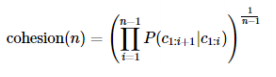
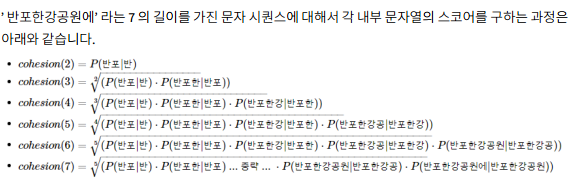

In [166]:
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [167]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

In [168]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

In [169]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [170]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

    - '반포한강공원'이 응집확률이 가장 높았다. 이는 반포한강공원이 하나의 단어로 판단하기에 가장 적합한 문자열이 '반포한강공원'이라고 볼 수 있다.

**4. SOYNLP의 브랜칭 엔트로피(branching enytropy)**<br>
   - Branching Entropy는 확률 분포의 엔트로피값을 사용한다. 이는 주어진 문자열에서 얼마나 다음 문자가 등장할 수 있는지를 판단하는 척도이다. 
   -  브랜칭 엔트로피를 주어진 문자 시퀀스에서 다음 문자 예측을 위해 헷갈리는 정도로 비유해본다. 브랜칭 엔트로피의 값은 하나의 완성된 단어에 가까워질수록 문맥으로 인해 점점 정확히 예측할 수 있게 되면서 점점 줄어드는 양상을 보인다.


In [171]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [172]:
word_score_table["디스플"].right_branching_entropy

-0.0

"디스" 뒤에는 다양한 단어가 존재할 수 있어 1.63이라는 값을 가지는 반면, "디스플" 뒤에는 레가 오는 것이 명백하기 때문에 -0.0이라는 값을 가진다.

In [173]:
word_score_table["디스플레"].right_branching_entropy

-0.0

In [174]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

값이 갑자기 증가하는 것을 볼 수 있다. 이는 문자 시퀀스 '디스플레이'라는 문자 시퀀스 다음에는 조사나 다른 단어와 같은 다양한 경우가 있을 수 있기 때문이다. 이는 하나의 단어가 끝나면 그 경계부분부터 다시 브랜칭 엔트로피 값이 증가함을 의미한다.

**5. SOYNLP의 tokenizer**<br>
한국어는 띄어쓰기 단위로 나눈 어절 토큰은 주로 L토큰 + R토큰의 형식을 가지는 경우가 많다. ex: 공원에 -> 공원 + 에 로 나눌 수 있다. <br>
L 토크나이저는 L 토큰 + R 토큰으로 나누되, 분리 기준을 점수가 가장 높은 L 토큰을 찾아내는 원리를 가지고 있다.

In [177]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}

l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척격하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척격하자', '')]

**6. 최대 점수 토크나이저**<br>
띄어쓰기가 되지 않는 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저

In [178]:
from soynlp.tokenizer import MaxScoreTokenizer

max_score_tokenizer = MaxScoreTokenizer(scores=scores)
max_score_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

**SOYNLP를 이용한 반복되는 문자정제**
<br>SNS나 채팅 데이터에는 ㅎㅎ 또는 ㅋㅋ와 같은 이모티콘의 경우 불필요하게 연속되는 경우가 많은데 ㅋㅋㅋㅋ,ㅋㅋㅋㅋㅋ,ㅋㅋㅋㅋㅋㅋ와 같은 경우를 모두 서로 다른 단어로 처리하는 것은 불필요하다. 이에 반복되는 것을 하나로 정규화 시킨다.

In [179]:
from soynlp.normalizer import *

In [180]:
print(emoticon_normalize("앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ", num_repeats=2))
print(emoticon_normalize("앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠㅠ", num_repeats=2))
print(emoticon_normalize("앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ", num_repeats=2))

아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ


의미없게 반복되는 것은 이모티콘에 한정되지 않는다.

In [181]:
print(emoticon_normalize("와하하하하하하하하핫", num_repeats=2))
print(emoticon_normalize("와하하하하하하핫", num_repeats=2))
print(emoticon_normalize("와하하하하핫", num_repeats=2))

와하하핫
와하하핫
와하하핫


**5. Customised KoNLPy**<br>
   - 영어권 언어는 띄어쓰기만 하여도, 단어 분리가 쉽지만 한국어는 그렇지 않다.
   - 형태소 분석기는 사용자 사전을 추가할 수 있다. 

In [182]:
from ckonlpy.tag import Twitter
twitter = Twitter()
twitter.morphs("은경이는 사무실로 갔습니다.")

E:\yujin\anaconda3\envs\py37\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['은', '경이', '는', '사무실', '로', '갔습니다', '.']

    - "은경이" 라는 단어가 "은", "경이"와 같이 분리된다. 이때, 형태소 분석기 Twitter에 add_dictionary("단어","품사")와 같은 형식으로 사전을 추가해줄 수 있다.

In [183]:
twitter.add_dictionary("은경이", "Noun")

In [184]:
twitter.morphs("은경이는 사무실로 갔습니다.")

['은경이', '는', '사무실', '로', '갔습니다', '.']

'은경이'라는 단어가 제대로 하나의 토큰으로 인식하는 것을 확인할 수 있다.